Бинарный классификатор. Логистическая регрессия

Импортируем необходимые библиотеки:
pandas - программная библиотека для обработки и анализа данных
matplotlib — библиотека на языке программирования Python для визуализации данных двумерной и трёхмерной графикой
(модуль pyplot отвечает за отображение разных графиков)
scikit-learn – это библиотека, широко используемая в машинном обучении. Она предоставляет значения для данных предварительной обработки, уменьшает размерность, реализует регрессию, классификацию, кластеризацию и т.д. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Этап предварительной обработки данных

Получаем данные из файла checker-timestamp.csv.
Создаем фрейм данных df с колонками: date, am, pm, target, где date это дата дня, am - количество коммитов в течение дня до полудня (integer), pm - количество коммитов в течение дня после полудня (integer), target - выходной/рабочий день.

In [4]:
df = pd.read_csv('data/checker_timestamp.csv', parse_dates=['timestamp'])
df

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [5]:
df['date'] = df['timestamp'].dt.date
df['am'] = df['timestamp'].dt.hour.apply(lambda x: 1 if x < 12 else 0)
df['pm'] = df['timestamp'].dt.hour.apply(lambda x: 1 if x >= 12 else 0)
df['target'] = df['timestamp'].dt.dayofweek.apply(lambda x: 'working_day' if x < 5 else 'weekend')

In [6]:
df = df.groupby(by=['date']).agg({'am': sum, 'pm': sum, 'target': 'last'})
df

,am,pm,target
date,,,
2020-04-17,21,2,working_day
2020-04-18,1,68,weekend
2020-04-19,18,15,weekend
2020-04-20,2,23,working_day
2020-04-21,0,25,working_day
2020-04-22,0,28,working_day
2020-04-23,10,33,working_day
2020-04-24,2,14,working_day
2020-04-25,30,74,weekend


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 2020-04-17 to 2020-05-21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   am      35 non-null     int64 
 1   pm      35 non-null     int64 
 2   target  35 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


Исследовательский анализ данных

Создаем график, где x - am, y - pm, каждая точка - день, рабочие дни и выходные имеют разный цвет. 

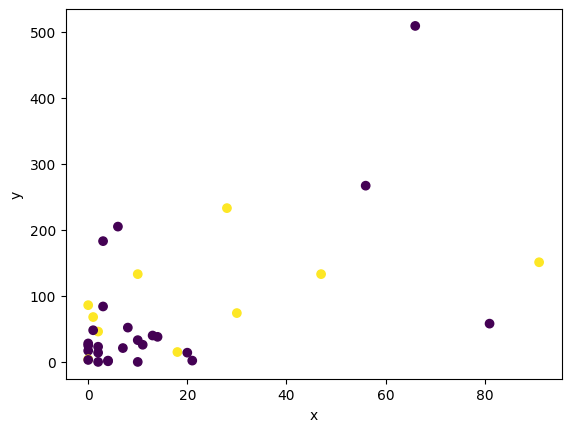

In [8]:
plt.scatter(df['am'], df['pm'], c=[0 if i == 'working_day' else 1 for i in df['target']])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Логистическая регрессия

Используем am и pm, параметры: random state=21, fit_intercept=False
Выстроим прогнозы на каждый день нашего набора данных и добавим их во фрейм данных как колонку predict.
Сохраняем фрейм данных в файл в подпапку дня с названием am_pm.csv.
Создаем другой график как делали ранее, но цвет берем из колонки predict.
Исследуя график, выскажите мнение, насколько хороший прогноз получился: "Да, прогноз верный" или "Нет, прогноз не очень верный".


In [9]:
X = df[['am', 'pm']].values
y = df['target'].values

In [10]:
lr = LogisticRegression(random_state=21, fit_intercept=False)
lr.fit(X, y)
y_pred = lr.predict(X)

In [11]:
df['predict'] = y_pred
df.to_csv('data/am_pm.csv')

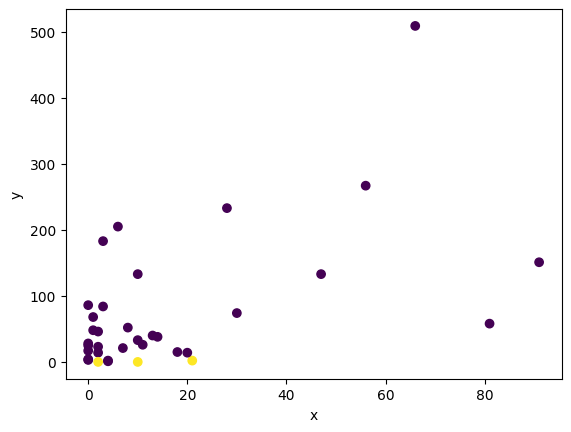

In [12]:
plt.scatter(df['am'], df['pm'], c=[0 if i == 'working_day' else 1 for i in df['predict']])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Нет, прогноз не очень верный

Оценка

Рассчитаем точность наших прогнозов.
Рассчитаем точность в случае, когда каждый прогноз - значение наиболее популярного класса дня.
Сравнивая точности, выскажите мнение, насколько хороший прогноз сделал классификатор: "Да, прогноз верный" или "Нет, прогноз не очень верный".

In [13]:
accuracy_score(y, y_pred)

0.6285714285714286

In [14]:
accuracy_score(y, [df['target'].mode().values] * len(y))

0.7142857142857143

Нет, прогноз не очень верный